In [1]:
import numpy as np
import networkx as nx

In [2]:
def matrix(n,p):
    g=nx.gnp_random_graph(n,p)
    nx.draw(g,node_size=20)
    A=nx.adjacency_matrix(g, nodelist=None, weight='weight')
    adja_mat=A.todense()
    transition_probability=np.zeros(adja_mat.shape)
    for i in range(adja_mat.shape[0]):
        for j in range(adja_mat.shape[0]):
            transition_probability[i][j]=adja_mat[i].item(j)/np.sum(adja_mat[i:i+1,])
    wigen_factor=np.zeros((1,transition_probability.shape[0]))
    for i in range(transition_probability.shape[0]):
        wigen_factor[0][i]=1/n
    return(transition_probability, wigen_factor)

In [4]:
matrix(10,0.45)

(array([[0.        , 0.        , 0.        , 0.25      , 0.25      ,
         0.        , 0.25      , 0.25      , 0.        , 0.        ],
        [0.        , 0.        , 0.33333333, 0.        , 0.        ,
         0.33333333, 0.        , 0.33333333, 0.        , 0.        ],
        [0.        , 0.5       , 0.        , 0.        , 0.        ,
         0.        , 0.5       , 0.        , 0.        , 0.        ],
        [0.33333333, 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.33333333, 0.        , 0.        ],
        [0.25      , 0.        , 0.        , 0.25      , 0.        ,
         0.        , 0.25      , 0.        , 0.25      , 0.        ],
        [0.        , 0.33333333, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.33333333, 0.33333333, 0.        ],
        [0.25      , 0.        , 0.25      , 0.        , 0.25      ,
         0.        , 0.        , 0.        , 0.        , 0.25      ],
        [0.25      , 0.25  

In [5]:
def page_rank(N,n,p):
    transition_probability, wigen_factor=matrix(n,p)
    for i in range(N):
        page_rank = wigen_factor.dot(transition_probability)
        if (page_rank==wigen_factor).all():
            print('consistant page rank')
            break
        else:
            wigen_factor =  page_rank
    return(page_rank)

array([[0.125  , 0.15625, 0.09375, 0.03125, 0.03125, 0.15625, 0.125  ,
        0.09375, 0.0625 , 0.125  ]])

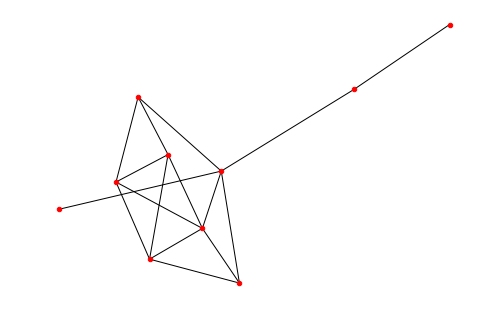

In [13]:
page_rank(100,10,0.45)